
# Stock Market Prediction using Numerical and Textual Analysis**

### **Author:** Kunal khandodiya

# **Step 1: Stock Price Analysis and Prediction**


# **Step 1.1: Importing Required Libraries for numerical analysis and prediction of stock prices**

Technical Stack used : 
* Numpy Array
* Matplotlib
* Pandas
* Keras
* Scikit Learn
* Math

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

# **Step 1.2 : Importing the Numerical dataset and performing Exploratory Analysis**

In [3]:
# Dataframe for exploratory analysis
df=pd.read_csv('TCS.NS_Stock.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
1,02-01-2003,61.525002,62.924999,57.912498,58.299999,43.443855,5325328.0
2,03-01-2003,60.000000,61.049999,58.500000,59.012501,43.974789,4198040.0
3,06-01-2003,59.924999,60.187500,56.875000,57.262501,42.670746,4121520.0
4,07-01-2003,58.000000,58.500000,56.062500,56.599998,42.177040,2650800.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476 entries, 0 to 4475
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4476 non-null   object 
 1   Open       4460 non-null   float64
 2   High       4460 non-null   float64
 3   Low        4460 non-null   float64
 4   Close      4460 non-null   float64
 5   Adj Close  4460 non-null   float64
 6   Volume     4460 non-null   float64
dtypes: float64(6), object(1)
memory usage: 244.9+ KB


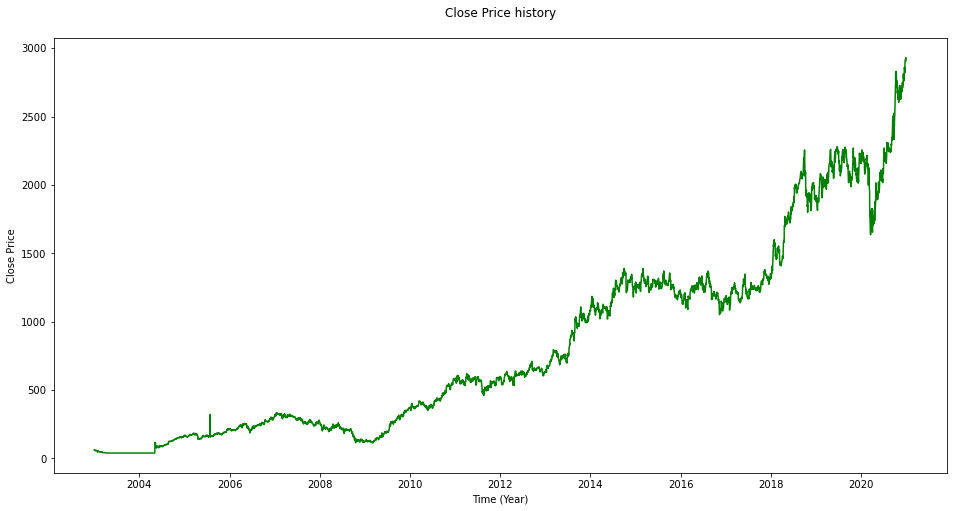

In [6]:
# Extract date frame and plot closing stock price w.r.t time
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.title('Close Price history\n')
plt.xlabel('Time (Year)')
plt.ylabel('Close Price')
plt.plot(df['Close'],color='g')

In [7]:
# fix random seed for reproducibility
np.random.seed(7)

# **Step 1.3 : Creating a dataframe for storing the Closing stock data per day**

In [8]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [9]:
df2 = pd.read_csv('TCS.NS_Stock.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

# **Step 1.4: Data Normalization and Division into Training and Test sets**

In [10]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [11]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# **Step 1.5 : Creating a LSTM Neural Network Model for Numerical Analysis**

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
597/597 - 3s - loss: 0.0048 - 3s/epoch - 4ms/step
Epoch 2/100
597/597 - 1s - loss: 2.6124e-05 - 717ms/epoch - 1ms/step
Epoch 3/100
597/597 - 1s - loss: 2.1754e-05 - 713ms/epoch - 1ms/step
Epoch 4/100
597/597 - 1s - loss: 1.8643e-05 - 706ms/epoch - 1ms/step
Epoch 5/100
597/597 - 1s - loss: 1.5709e-05 - 695ms/epoch - 1ms/step
Epoch 6/100
597/597 - 1s - loss: 1.3603e-05 - 686ms/epoch - 1ms/step
Epoch 7/100
597/597 - 1s - loss: 1.3455e-05 - 985ms/epoch - 2ms/step
Epoch 8/100
597/597 - 1s - loss: 1.2454e-05 - 732ms/epoch - 1ms/step
Epoch 9/100
597/597 - 1s - loss: 1.2584e-05 - 719ms/epoch - 1ms/step
Epoch 10/100
597/597 - 1s - loss: 1.3332e-05 - 706ms/epoch - 1ms/step
Epoch 11/100
597/597 - 1s - loss: 1.3426e-05 - 854ms/epoch - 1ms/step
Epoch 12/100
597/597 - 1s - loss: 1.2179e-05 - 782ms/epoch - 1ms/step
Epoch 13/100
597/597 - 1s - loss: 1.2699e-05 - 604ms/epoch - 1ms/step
Epoch 14/100
597/597 - 1s - loss: 1.2558e-05 - 798ms/epoch - 1ms/step
Epoch 15/100
597/597 - 1s - loss: 1.

# **Step 1.6 : Making Predictions of the Model**

In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

46/46 [==============================] - 0s 1ms/step


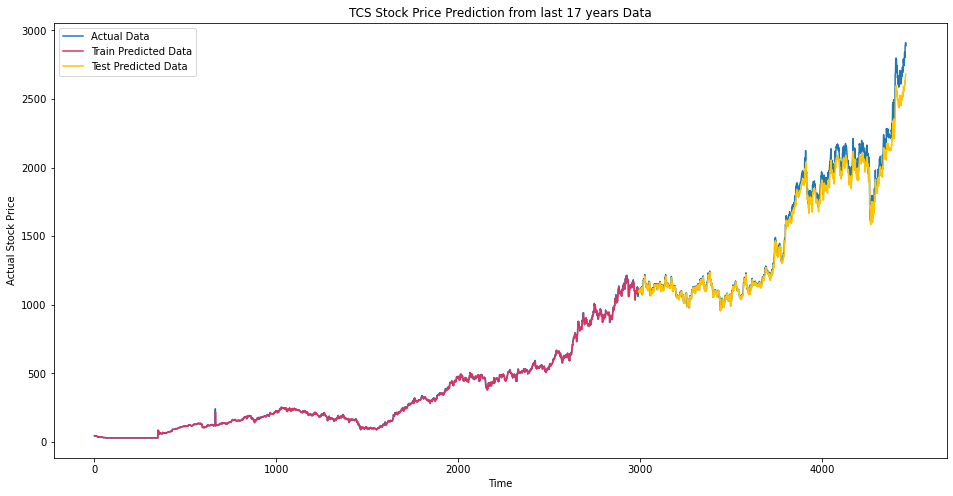

In [14]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df2), label = 'Actual Data')
plt.title('TCS Stock Price Prediction from last 17 years Data')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.plot(trainPredictPlot,color='#DE3163', label = 'Train Predicted Data')
plt.plot(testPredictPlot, color='#FFC300', label = 'Test Predicted Data')
plt.legend(loc='best')
plt.show()

In [15]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error of Training  = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error of Testing = ",testScore," RMSE")


Root mean square error of Training  =  8.396222037406277  RMSE
Root mean square error of Testing =  62.86683286383806  RMSE


# **Step 2: Textual Data(News Headlines) Analysis**

# **Step 2.1:  Importing Required Libraries for Textual (News Headlines) analysis**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime

# **Step 2.2 : Importing the Textual dataset and performing Exploratory Analysis**

In [21]:
data = pd.read_csv('india-news-headlines.csv')
data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [22]:
data['publish_date'].duplicated()

0          False
1           True
2           True
3           True
4           True
           ...  
3650965     True
3650966     True
3650967     True
3650968     True
3650969     True
Name: publish_date, Length: 3650970, dtype: bool

In [17]:
data = data.drop_duplicates('publish_date', keep='first').sort_index()
data= data.reset_index()

In [18]:
data.rename(columns={'publish_date': 'Date'},inplace = True)
data.head()

,index,Date,headline_category,headline_text
0,0,02-01-2001,unknown,Status quo will not be disturbed at Ayodhya; s...
1,86,03-01-2001,unknown,Powerless north India gropes in the dark
2,127,04-01-2001,unknown,The string that pulled Stephen Hawking to India
3,280,05-01-2001,unknown,Light combat craft takes India into club class
4,406,06-01-2001,unknown,Light combat craft takes India into club class


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632 entries, 0 to 3631
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              3632 non-null   int64 
 1   Date               3632 non-null   object
 2   headline_category  3632 non-null   object
 3   headline_text      3632 non-null   object
dtypes: int64(1), object(3)
memory usage: 113.6+ KB


In [20]:
data['headline_category'].value_counts()

unknown                            758
entertainment.hindi.bollywood      330
india                              320
edit-page                          250
business.india-business            159
                                  ... 
home.environment.global-warming      1
players-profiles                     1
drivers                              1
silver-jubilee                       1
friendship-day                       1
Name: headline_category, Length: 147, dtype: int64

In [21]:
city_data = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
city_data

,index,Date,headline_category,headline_text
8,642,10-01-2001,city.patna,Fend for yourselves; Pande tells doctors
48,2215,09-03-2001,city.delhi,Maneka asks govt to take back land for cow she...
114,4563,22-05-2001,city.pune,She turned and fought
116,4693,27-05-2001,city.bengaluru,Need to boost exports; says bank head
118,4917,29-05-2001,city.bengaluru,US visit won't be piece of cake for Krishna
...,...,...,...,...
3597,1027816,20-12-2010,city.ranchi,Maoist camp busted in Khunti encounter
3604,1031543,27-12-2010,city.guwahati,PM's heart surgeon injured in road mishap
3613,1036243,05-01-2011,city.surat,Man dies of heart attack after killing lover's...
3625,1044084,17-01-2011,city.bengaluru,Older brother in the dark about sibling's death


In [22]:
city_split = pd.DataFrame(columns=['city_name'])

In [23]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]

In [24]:
# concate the data set city_data and city_split
city_data = pd.concat([city_data,city_split],axis=1)

In [25]:
# removing unnecessary column from dataset
city_data.drop(columns=['headline_category'],axis=1, inplace=True)

In [26]:
# re-setting the index
city_data.reset_index(inplace=True)

In [27]:
# see the final data which contain city_name column
city_data.head()

,level_0,index,Date,headline_text,city_name
0,8,642,10-01-2001,Fend for yourselves; Pande tells doctors,patna
1,48,2215,09-03-2001,Maneka asks govt to take back land for cow she...,delhi
2,114,4563,22-05-2001,She turned and fought,pune
3,116,4693,27-05-2001,Need to boost exports; says bank head,bengaluru
4,118,4917,29-05-2001,US visit won't be piece of cake for Krishna,bengaluru


In [28]:
city_data.drop(['level_0', 'index'],axis=1)

,Date,headline_text,city_name
0,10-01-2001,Fend for yourselves; Pande tells doctors,patna
1,09-03-2001,Maneka asks govt to take back land for cow she...,delhi
2,22-05-2001,She turned and fought,pune
3,27-05-2001,Need to boost exports; says bank head,bengaluru
4,29-05-2001,US visit won't be piece of cake for Krishna,bengaluru
...,...,...,...
508,20-12-2010,Maoist camp busted in Khunti encounter,ranchi
509,27-12-2010,PM's heart surgeon injured in road mishap,guwahati
510,05-01-2011,Man dies of heart attack after killing lover's...,surat
511,17-01-2011,Older brother in the dark about sibling's death,bengaluru


In [29]:
# there are so many cities which we can see
city_data.city_name.unique()

array(['patna', 'delhi', 'pune', 'bengaluru', 'ahmedabad', 'mumbai',
       'thiruvananthapuram', 'kolkata', 'hyderabad', 'lucknow',
       'chandigarh', 'goa', 'nagpur', 'guwahati', 'rajkot', 'bhubaneswar',
       'surat', 'allahabad', 'varanasi', 'vadodara', 'mangaluru',
       'ranchi', 'jaipur', 'ludhiana', 'mysuru', 'kanpur'], dtype=object)

# **Step 2.3: Representing number of headline text (News Headline) per city**

In [30]:
# create a group of cities and let's see which city have, how many no. of headine text
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})

In [31]:
#for better understanding remane the column
city_headline.rename(columns={'headline_text':'Number_of_headline_text'},inplace=True)

In [32]:
# finding the top 15 cities which have high number of headlines text
city_headline = city_headline.sort_values(by='Number_of_headline_text',ascending=False)
top_15_headline_city = city_headline.head(15)
top_15_headline_city

,Number_of_headline_text
city_name,
bengaluru,75
delhi,64
ahmedabad,52
mumbai,47
pune,40
hyderabad,33
lucknow,32
kolkata,30
chandigarh,29


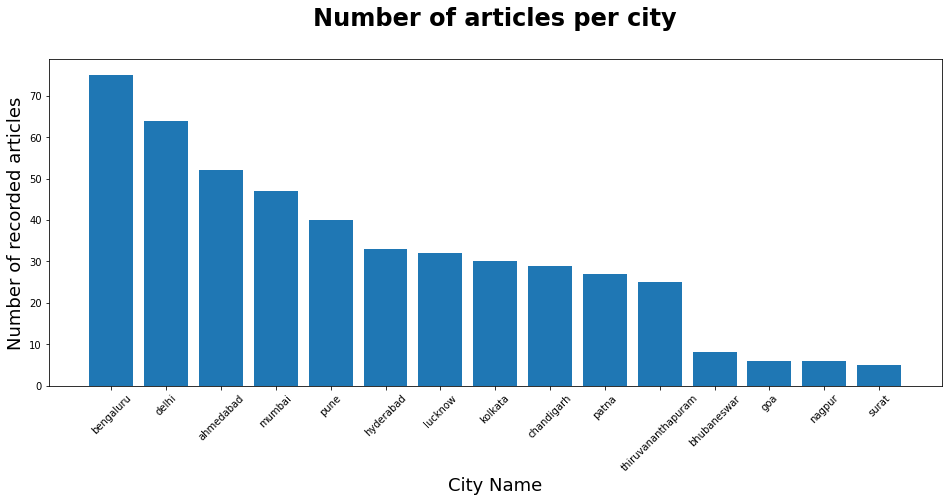

In [33]:
# plotting a graph for better understanding for top 15 cities which have high no. of headline text

plt.figure(figsize=(16,6))
plt.bar(top_15_headline_city.index,height=top_15_headline_city['Number_of_headline_text'])
plt.xticks(rotation = 45)
plt.xlabel('City Name',fontsize=18)
plt.ylabel('Number of recorded articles',fontsize=18)
plt.title('Number of articles per city\n',fontsize=24, fontweight='bold')
plt.show()

# **Step 2.4: Representing Number of News Headlines per year and per city**

In [34]:
city_data['Date'] = pd.to_datetime(city_data['Date'])
city_data.head()

,level_0,index,Date,headline_text,city_name
0,8,642,2001-10-01,Fend for yourselves; Pande tells doctors,patna
1,48,2215,2001-09-03,Maneka asks govt to take back land for cow she...,delhi
2,114,4563,2001-05-22,She turned and fought,pune
3,116,4693,2001-05-27,Need to boost exports; says bank head,bengaluru
4,118,4917,2001-05-29,US visit won't be piece of cake for Krishna,bengaluru


In [35]:
city_data['Year'] = city_data['Date'].apply(lambda x: (x.year))

In [36]:
# dropping unnecessary columns
city_data.drop(columns=['Date','index'],axis=1,inplace=True)

In [37]:
# final result
city_data.head()

,level_0,headline_text,city_name,Year
0,8,Fend for yourselves; Pande tells doctors,patna,2001
1,48,Maneka asks govt to take back land for cow she...,delhi,2001
2,114,She turned and fought,pune,2001
3,116,Need to boost exports; says bank head,bengaluru,2001
4,118,US visit won't be piece of cake for Krishna,bengaluru,2001


In [38]:
city_data_2 = city_data.copy()
city_data_2['Number_of_headline_text'] = 1

In [39]:
# dropping unwanted column
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)

In [40]:
city_data_2.head()

,level_0,city_name,Year,Number_of_headline_text
0,8,patna,2001,1
1,48,delhi,2001,1
2,114,pune,2001,1
3,116,bengaluru,2001,1
4,118,bengaluru,2001,1


In [41]:
top_15_headline_city.head(7)

,Number_of_headline_text
city_name,
bengaluru,75
delhi,64
ahmedabad,52
mumbai,47
pune,40
hyderabad,33
lucknow,32


In [42]:
# creating new data_set for top 7 cities with year 

city_beng = city_data_2[city_data_2.city_name == 'bengaluru']
city_del = city_data_2[city_data_2.city_name == 'delhi']
city_ahme = city_data_2[city_data_2.city_name == 'ahmedabad']
city_mum = city_data_2[city_data_2.city_name == 'mumbai']
city_pune = city_data_2[city_data_2.city_name == 'pune']
city_hyd = city_data_2[city_data_2.city_name == 'hyderabad']
city_luck = city_data_2[city_data_2.city_name == 'luck']

In [43]:
famous_cities = [city_beng, city_del, city_ahme, city_mum, city_pune, city_hyd, city_luck]
data_famous_cities = pd.concat(famous_cities)

In [44]:
# reset index numbers
data_famous_cities.reset_index(inplace=True)

In [45]:
# top 7 cities
print(data_famous_cities.shape)
data_famous_cities.head()

(311, 5)


,index,level_0,city_name,Year,Number_of_headline_text
0,3,116,bengaluru,2001,1
1,4,118,bengaluru,2001,1
2,5,119,bengaluru,2001,1
3,7,135,bengaluru,2001,1
4,10,138,bengaluru,2001,1


In [46]:
data_famous_cities=data_famous_cities.drop(['level_0'],axis=1)
data_famous_cities.head()

,index,city_name,Year,Number_of_headline_text
0,3,bengaluru,2001,1
1,4,bengaluru,2001,1
2,5,bengaluru,2001,1
3,7,bengaluru,2001,1
4,10,bengaluru,2001,1


In [47]:
# year-wise no. of headlines text
city_year_count = pd.Series(city_data_2.groupby(['Year'])['Number_of_headline_text'].count())

# year-wise data which shows which city have how many no. of headline text
city_count = data_famous_cities.groupby(['Year', 'city_name']).sum()['Number_of_headline_text'].unstack()

In [48]:
city_count.head()

city_name,ahmedabad,bengaluru,delhi,hyderabad,mumbai,pune
Year,,,,,,
2001,12.0,24.0,7.0,11.0,12.0,10.0
2002,5.0,5.0,1.0,8.0,6.0,8.0
2003,8.0,8.0,3.0,4.0,9.0,4.0
2004,11.0,2.0,16.0,7.0,9.0,12.0
2005,6.0,12.0,17.0,NaN,1.0,2.0


In [49]:
city_year_count.head()

Year
2001    124
2002     54
2003     62
2004     92
2005     43
Name: Number_of_headline_text, dtype: int64

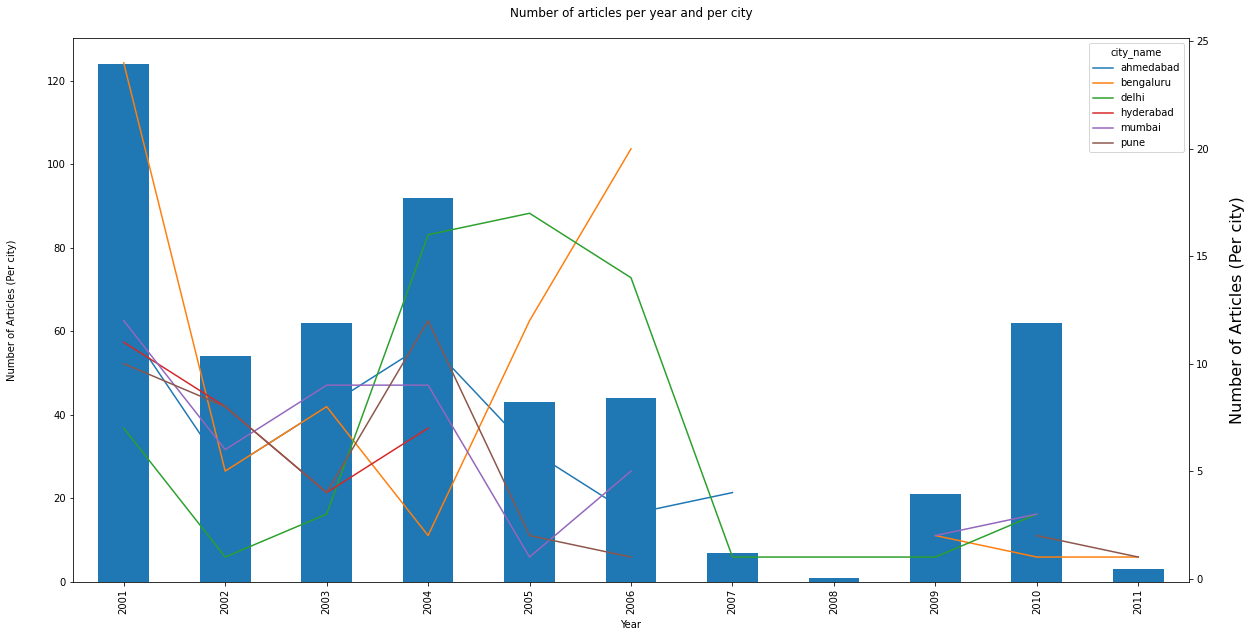

<Figure size 1440x720 with 0 Axes>

In [50]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Number of articles per year and per city\n")
a.set_ylabel('Number of Articles (Per city)')
a.set_xlabel("")

city_count.plot(ax=b)
b.set_xticks([])
b.set_ylabel('Number of Articles (Per city)', size =16)
b.yaxis.tick_right()
b.set_xlabel('Year') 

a.get_yaxis().set_label_coords(-.05,0.5)
b.get_yaxis().set_label_coords(1.05,0.5)
b.get_xaxis().set_label_coords(0.5, -0.07)

plt.show()

# **Step 2.5: Sentiment Analysis of News Headlines**

In [51]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [52]:
data['Result'] = np.array([getAnalysis_polarity(headline) for headline in data['headline_text']])

In [53]:
final_result = data.groupby(['Result']).agg({'headline_text':'count'})
final_result

,headline_text
Result,
negative,289
neutral,2636
positive,707


In [54]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100


print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    19.465859
Name: positive, dtype: float64


Negative Headlines:  headline_text    7.957048
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    72.577093
Name: neutral, dtype: float64


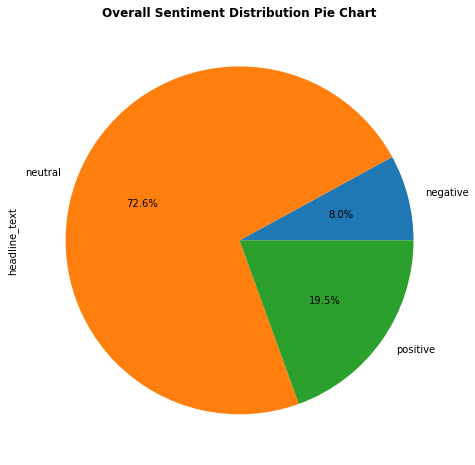

In [55]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.title("Overall Sentiment Distribution Pie Chart",fontweight="bold")
plt.show()

# **Step 3: Creating Hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines**

# **Step 3.1: Importing Required Libraries**

In [56]:
!pip install vaderSentiment

In [57]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Step 3.2 : Importing the Numerical and Textual dataset**

In [58]:
stock_data=pd.read_csv('/content/drive/MyDrive/The Sparks Foundation/dataset/TCS.NS_Stock.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
1,02-01-2003,61.525002,62.924999,57.912498,58.299999,43.443855,5325328.0
2,03-01-2003,60.000000,61.049999,58.500000,59.012501,43.974789,4198040.0
3,06-01-2003,59.924999,60.187500,56.875000,57.262501,42.670746,4121520.0
4,07-01-2003,58.000000,58.500000,56.062500,56.599998,42.177040,2650800.0


In [59]:
news_data=pd.read_csv('/content/drive/MyDrive/The Sparks Foundation/dataset/india-news-headlines_1.csv')
news_data.head()

,publish_date,headline_category,headline_text
0,02-01-2001,unknown,Status quo will not be disturbed at Ayodhya; s...
1,02-01-2001,unknown,Fissures in Hurriyat over Pak visit
2,02-01-2001,unknown,America's unwanted heading for India?
3,02-01-2001,unknown,For bigwigs; it is destination Goa
4,02-01-2001,unknown,Extra buses to clear tourist traffic


In [60]:
news_data.rename(columns={'publish_date': 'Date'},inplace = True)
news_data.head()

,Date,headline_category,headline_text
0,02-01-2001,unknown,Status quo will not be disturbed at Ayodhya; s...
1,02-01-2001,unknown,Fissures in Hurriyat over Pak visit
2,02-01-2001,unknown,America's unwanted heading for India?
3,02-01-2001,unknown,For bigwigs; it is destination Goa
4,02-01-2001,unknown,Extra buses to clear tourist traffic


# **Step 3.3: Creating Hybrid data from Numerical and Textual Data**

In [61]:
hybrid_data = pd.merge(stock_data,news_data, 
                   on='Date', 
                   how ='inner',
                   left_index = True)

In [62]:
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text
172470,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Chastened BCC members decide to mend ways
172471,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,New look for slums; govt to start work
172472,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Global spiritual meet to begin from Jan. 16
172473,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Parameshwara allays fears of scrapping CET
172474,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Amusement park opens today


# **Step 3.4: Performing Sentiment Analysis on Hybrid Data**

## **Step 3.4.1: Sentiment Analysis using TextBlob**

In [63]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [64]:
hybrid_data['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_data['headline_text']])
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,sentiment
172470,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Chastened BCC members decide to mend ways,neutral
172471,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,New look for slums; govt to start work,positive
172472,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Global spiritual meet to begin from Jan. 16,neutral
172473,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Parameshwara allays fears of scrapping CET,neutral
172474,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Amusement park opens today,neutral


In [65]:
senti_data = pd.get_dummies(hybrid_data['sentiment'],drop_first=True)

In [66]:
hybrid_data = pd.concat([hybrid_data,senti_data],axis=1)

In [67]:
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,sentiment,neutral,positive
172470,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Chastened BCC members decide to mend ways,neutral,1,0
172471,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,New look for slums; govt to start work,positive,0,1
172472,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Global spiritual meet to begin from Jan. 16,neutral,1,0
172473,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Parameshwara allays fears of scrapping CET,neutral,1,0
172474,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Amusement park opens today,neutral,1,0


## **Step 3.4.2: Adding subjectivity and polarity Scores to Textual Data (News Headlines)**

In [68]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [69]:
#Adding subjectivity and polarity columns
hybrid_data['Subjectivity'] =hybrid_data['headline_text'].apply(getSubjectivity)
hybrid_data['Polarity'] = hybrid_data['headline_text'].apply(getPolarity)
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity
172470,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Chastened BCC members decide to mend ways,neutral,1,0,0.000000,0.000000
172471,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,New look for slums; govt to start work,positive,0,1,0.454545,0.136364
172472,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Global spiritual meet to begin from Jan. 16,neutral,1,0,0.066667,0.000000
172473,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Parameshwara allays fears of scrapping CET,neutral,1,0,0.000000,0.000000
172474,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Amusement park opens today,neutral,1,0,0.000000,0.000000


## **Step 3.4.3: Visualizing the polarity and Subjectivity scores**


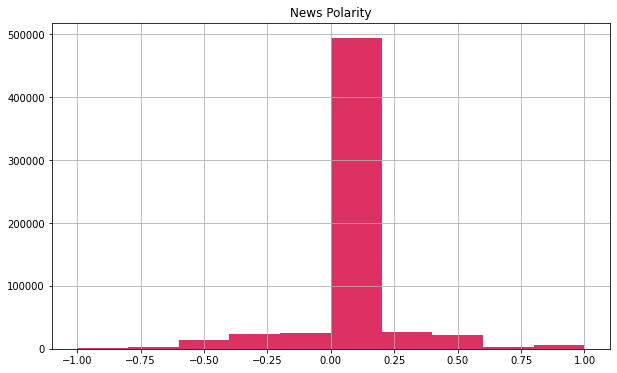

In [70]:
plt.figure(figsize = (10,6))
plt.title('News Polarity')
hybrid_data['Polarity'].hist(color = '#DE3163')

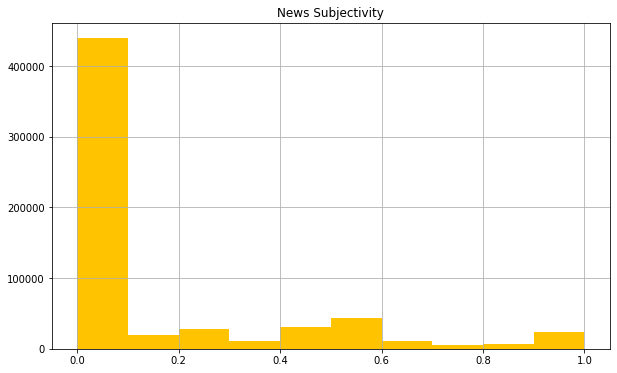

In [71]:
plt.figure(figsize = (10,6))
plt.title('News Subjectivity')
hybrid_data['Subjectivity'].hist(color = '#FFC300')

## **Step 3.4.4 : Performing Sentiment Analysis over the news Headlines of Hybrid Data**

In [72]:
#Adding sentiment score to news
senti_int_an = SentimentIntensityAnalyzer()

hybrid_data['Compound'] = [senti_int_an.polarity_scores(v)['compound'] for v in hybrid_data['headline_text']]
hybrid_data['Negative'] = [senti_int_an.polarity_scores(v)['neg'] for v in hybrid_data['headline_text']]
hybrid_data['Neutral'] = [senti_int_an.polarity_scores(v)['neu'] for v in hybrid_data['headline_text']]
hybrid_data['Positive'] = [senti_int_an.polarity_scores(v)['pos'] for v in hybrid_data['headline_text']]
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
172470,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Chastened BCC members decide to mend ways,neutral,1,0,0.000000,0.000000,0.0000,0.000,1.000,0.000
172471,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,New look for slums; govt to start work,positive,0,1,0.454545,0.136364,0.0000,0.000,1.000,0.000
172472,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Global spiritual meet to begin from Jan. 16,neutral,1,0,0.066667,0.000000,0.0000,0.000,1.000,0.000
172473,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Parameshwara allays fears of scrapping CET,neutral,1,0,0.000000,0.000000,-0.4215,0.359,0.641,0.000
172474,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Amusement park opens today,neutral,1,0,0.000000,0.000000,0.3612,0.000,0.545,0.455


In [73]:
hybrid_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'headline_category', 'headline_text', 'sentiment', 'neutral',
       'positive', 'Subjectivity', 'Polarity', 'Compound', 'Negative',
       'Neutral', 'Positive'],
      dtype='object')

In [74]:
req_col = [ 'Open',  'High', 'Low','Volume','Compound', 'Negative', 'Neutral' ,'Positive','positive']

In [75]:
new_hybrid = hybrid_data[req_col]
new_hybrid.reset_index(inplace = True)

In [76]:
new_hybrid.rename(columns = {'positive':'Label'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
new_hybrid.head()

,index,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,172470,59.987499,61.974998,59.987499,6027072.0,0.0000,0.000,1.000,0.000,0
1,172471,59.987499,61.974998,59.987499,6027072.0,0.0000,0.000,1.000,0.000,1
2,172472,59.987499,61.974998,59.987499,6027072.0,0.0000,0.000,1.000,0.000,0
3,172473,59.987499,61.974998,59.987499,6027072.0,-0.4215,0.359,0.641,0.000,0
4,172474,59.987499,61.974998,59.987499,6027072.0,0.3612,0.000,0.545,0.455,0


In [78]:
new_hybrid.shape

(620155, 10)

# **Step 3.5: Training and Testing the Models for Stock Price/Performance Analysis**

In [79]:
X = new_hybrid.drop('Label', axis=1)    

y = new_hybrid['Label']  

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [81]:
np.any(np.isnan(x_train)) 

True

In [82]:
np.all(np.isfinite(x_train)) 

False

In [83]:
x_train = x_train.fillna(x_train.mean())

In [84]:
x_test=x_test.fillna(x_test.mean())

## **Step 3.5.1: Stock Price/Performance analysis using Logistic Regressor Model**

In [85]:
logit = LogisticRegression()
logit.fit(x_train,y_train)
y_logit_pred = logit.predict(x_test)
accuracy_score(y_test,y_logit_pred)

0.8322032395127025

## **Step 3.5.2: Stock Price/Performance analysis using Random Forest Model**

In [86]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
accuracy_score(y_test,y_rf_pred)

0.8119986132499133

## **Step 3.5.3 : Stock Price/Performance analysis using Decision Tree Model**

In [87]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dt_pred = dt.predict(x_test)
accuracy_score(y_test,y_dt_pred)

0.7930759245672453

## **Step 3.5.4 : Stock Price/Performance analysis using Linear Discriminant Analyser Model**

In [88]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_lda_pred = lda.predict(x_test)
accuracy_score(y_test,y_lda_pred)

0.834484927155308

## **Step 3.5.5 : Stock Price/Performance analysis using AdaBoost Model**

In [89]:
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_adb_pred = adb.predict(x_test)
accuracy_score(y_test,y_adb_pred)

0.8535849908490619

## **Step 3.5.6: Stock Price/Performance analysis using Logistic Gradient Boosting Model**

In [90]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
accuracy_score(y_test,y_xgb_pred)


0.855213615950851

In [92]:
print("Accuracy of Logistic Regression Model: ",accuracy_score(y_test,y_logit_pred)*100,"%")
print("Accuracy of Random forest Model      : ",accuracy_score(y_test,y_rf_pred)*100,"%")
print("Accuracy of Decision Tree Model      : ",accuracy_score(y_test,y_dt_pred)*100,"%")
print("Accuracy of Linear Discriminant Mode  : ",accuracy_score(y_test,y_lda_pred)*100,"%")
print("Accuracy of AdaBoost Model           : ",accuracy_score(y_test,y_adb_pred)*100,"%")
print("Accuracy of Gradient Boosting Model  : ",accuracy_score(y_test,y_xgb_pred)*100,"%")

Accuracy of Logistic Regression Model:  83.22032395127025 %
Accuracy of Random forest Model      :  81.19986132499133 %
Accuracy of Decision Tree Model      :  79.30759245672454 %
Accuracy of Linear Discriminant Mode  :  83.4484927155308 %
Accuracy of AdaBoost Model           :  85.35849908490619 %
Accuracy of Gradient Boosting Model  :  85.5213615950851 %


# **Conclusion:**

Here, I have used six different Neural Network models to carry out the analysis and prediction of stock price/performance and train them with Hybrid data generated from Numerical data (i.e. Last 17 years Stock price/performance records of TCS (Tata Consultancy Service)) and Textual data (i.e.India News Headlines data). 

WI have found accuracy of  each model as mention below:


1. Logistic Regression Model:  83.22032395127025 %
2. Random forest Model      :  81.19986132499133 %
3. Decision Tree Model      :  79.30759245672454 %
4. Linear Discriminant Model :  83.4484927155308 %
5. AdaBoost Model           :  85.35849908490619 %
6. **Gradient Boosting Model  :  85.5213615950851 %**

 At the end, we can clearly see that Gradient Boosing Model gives more accuracy(i.e. 85.5%)  as compared to all other models.Gradient Boosting Model has 85.5% accuracy which means it performs better  on Analysis and prediction of Stock price/performance than other 5 Neural Network Models.